In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/sample_submission.csv
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test-without_segmentation.json
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/train.json
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000115_frame0000041.jpg
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000265_frame0000006.jpg
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000139_frame0000009.jpg
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000031_frame0000032.jpg
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000023_frame0000014.jpg
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000085_frame0000027.jpg
/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/vid_000021_fr

In [2]:
import json

train_json_file = "/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/train.json"
f = open(train_json_file)
train_json = json.load(f)
train_json.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [3]:
import pandas as pd

train_images_df = pd.DataFrame.from_dict(train_json['images'])
train_images_df.head()

,id,file_name,width,height
0,1,vid_000159_frame0000008.jpg,480,270
1,2,vid_000339_frame0000012.jpg,480,270
2,3,vid_000282_frame0000081.jpg,480,270
3,4,vid_000157_frame0000007.jpg,480,270
4,5,vid_000039_frame0000012.jpg,480,270


In [4]:
train_annotations_df = pd.DataFrame.from_dict(train_json['annotations'])
train_annotations_df.head()

,segmentation,area,iscrowd,image_id,id
0,"[[243.0, 188.2485294117647, 245.0, 183.7485294...",16548.503933,0,6,2
1,"[[240.0, 170.99803921568628, 254.9980392156862...",2280.685302,0,8,3
2,"[[352.0, 117.99798387096774, 380.0, 99.9980392...",2804.240185,0,10,4
3,"[[162.0, 131.99803921568628, 179.0, 130.998039...",617.828439,0,11,5
4,"[[426.0, 142.4985294117647, 430.9980392156863,...",1311.744125,0,12,6


In [5]:
train_segmentation_df = train_annotations_df[['segmentation', 'image_id']]
train_segmentation_df.head()

,segmentation,image_id
0,"[[243.0, 188.2485294117647, 245.0, 183.7485294...",6
1,"[[240.0, 170.99803921568628, 254.9980392156862...",8
2,"[[352.0, 117.99798387096774, 380.0, 99.9980392...",10
3,"[[162.0, 131.99803921568628, 179.0, 130.998039...",11
4,"[[426.0, 142.4985294117647, 430.9980392156863,...",12


In [6]:
count_trash = []
for i in range(len(train_segmentation_df)):
    count_trash.append(len(train_segmentation_df.loc[i,"segmentation"]))

train_segmentation_df.insert(2,'count_trash',count_trash,True)
train_segmentation_df.head()

,segmentation,image_id,count_trash
0,"[[243.0, 188.2485294117647, 245.0, 183.7485294...",6,2
1,"[[240.0, 170.99803921568628, 254.9980392156862...",8,1
2,"[[352.0, 117.99798387096774, 380.0, 99.9980392...",10,1
3,"[[162.0, 131.99803921568628, 179.0, 130.998039...",11,1
4,"[[426.0, 142.4985294117647, 430.9980392156863,...",12,1


<Axes: xlabel='count_trash'>

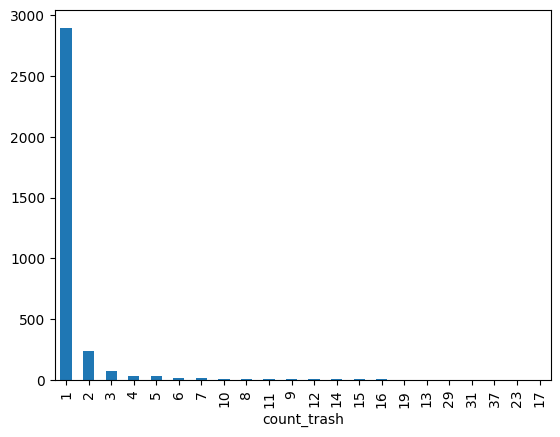

In [7]:
train_segmentation_df['count_trash'].value_counts().plot(kind = 'bar')

In [8]:
train_segmentation_df['count_trash'].value_counts()

count_trash
1     2896
2      238
3       73
4       34
5       32
6       16
7       14
10       7
8        7
11       6
9        5
12       4
14       3
15       3
16       3
19       2
13       2
29       1
31       1
37       1
23       1
17       1
Name: count, dtype: int64

In [9]:
train_segmentation_df_count_17 = train_segmentation_df[train_segmentation_df['count_trash'] == 17]
train_segmentation_df_count_17

,segmentation,image_id,count_trash
3166,"[[330.0, 270.74305555555554, 330.9888888888889...",5769,17


In [10]:
image_id_5769 = train_images_df.loc[train_images_df['id'] == 5769]
image_id_5769

,id,file_name,width,height
5768,5769,vid_000113_frame0000010.jpg,480,270


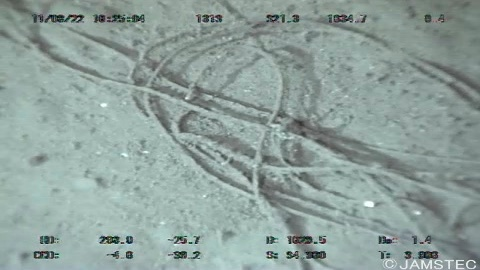

In [11]:
from PIL import Image, ImageDraw
import os

image_5769_path = os.path.join("/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/train/train/",image_id_5769['file_name'][5768])
image_5769 = Image.open(image_5769_path)
image_5769

In [12]:
seg_5769 = train_segmentation_df_count_17.iloc[0]["segmentation"]

In [13]:
import numpy as np

segmentation_polygons = []
for s in seg_5769:
    segmentation_polygons.append(np.array(s).reshape(-1, 2))

In [14]:
def draw_polygons_on_image(image, polygons):
    """
    Draws polygons on an image.
    Args:
    - image (PIL.Image): The image on which to draw.
    - polygons (list of np.array): List of polygons (each polygon is np.array of points).
    Returns:
    - PIL.Image: Image with polygons drawn on it with alpha transparency.
    
    """
    rgba_image = Image.new("RGBA", image.size,color="black")
    draw = ImageDraw.Draw(rgba_image)
    for polygon in polygons:
        points = tuple(map(tuple, polygon))  
        #draw.polygon(points, outline=(255,0,255,255), fill=((255,0,255,128)))
        draw.polygon(points, outline="white", fill="white")
    
    combined = Image.alpha_composite(image.convert("RGBA"), rgba_image)
    return combined.convert('RGBA')

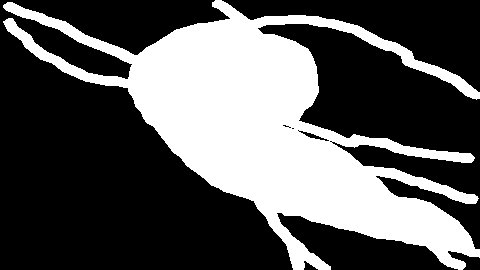

In [15]:
image_with_seg_5769 = draw_polygons_on_image(image_5769, segmentation_polygons)
image_with_seg_5769

In [16]:
image_id_6 = train_images_df.loc[train_images_df['id'] == 6]
image_id_6

,id,file_name,width,height
5,6,vid_000148_frame0000024.jpg,480,270


In [17]:
image_id_6.loc[image_id_6.index[0],"file_name"]

'vid_000148_frame0000024.jpg'

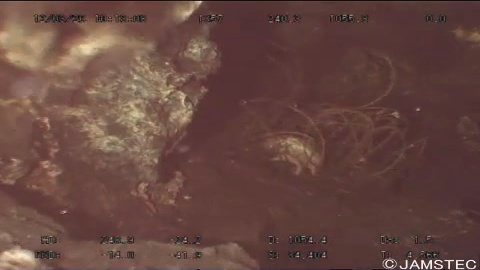

In [18]:
from PIL import Image, ImageDraw
import os

image_6_path = os.path.join("/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/train/train/",image_id_6['file_name'][5])
image_6 = Image.open(image_6_path)
image_6

In [19]:
train_segmentation_df_image_id_6 = train_segmentation_df[train_segmentation_df['image_id'] == 6]
train_segmentation_df_image_id_6

,segmentation,image_id,count_trash
0,"[[243.0, 188.2485294117647, 245.0, 183.7485294...",6,2


In [20]:
train_segmentation_df_image_id_6.loc[0,"image_id"]

6

In [21]:
seg_6 = train_segmentation_df_image_id_6.iloc[0]["segmentation"]

In [22]:
import numpy as np

segmentation_polygons = []
for s in seg_6:
    segmentation_polygons.append(np.array(s).reshape(-1, 2))

In [23]:
segmentation_polygons[1].shape

(4, 2)

In [24]:
def draw_polygon_on_image(image, polygon):
    rgba_image = Image.new("RGBA", image.size,color="black")
    draw = ImageDraw.Draw(rgba_image)
    points = tuple(map(tuple,polygon))
    #draw.polygon(points, outline=(255,0,255,255), fill=((255,0,255,128)))
    draw.polygon(points, outline="white", fill="white")
    combined = Image.alpha_composite(image.convert("RGBA"), rgba_image)
    return combined.convert('RGBA')

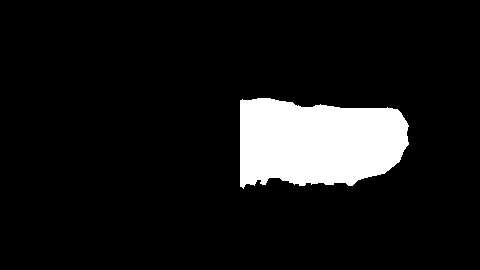

In [25]:
temp = draw_polygon_on_image(image_6, segmentation_polygons[0])
temp

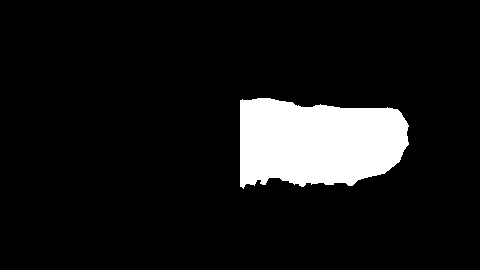

In [26]:
image_with_seg = draw_polygons_on_image(image_6, segmentation_polygons)
image_with_seg

In [27]:
def draw_black_image():
    return Image.new("RGBA",(480,270),color="black")
    #draw = ImageDraw.Draw(rgba_image)
    #combined = Image.alpha_composite(image.convert("RGBA"), rgba_image)
    #return combined.convert('RGBA')

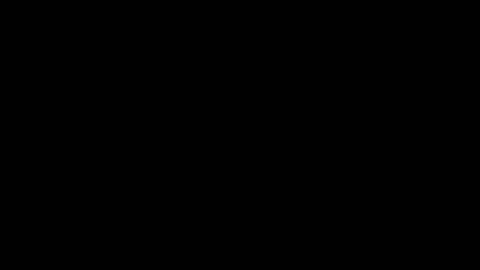

In [28]:
black_image = draw_black_image()
black_image

In [29]:
PATH_TRAIN_MASK = "/kaggle/working/train_mask/"
os.mkdir(PATH_TRAIN_MASK) 
PATH_MASK = os.path.join(PATH_TRAIN_MASK,"mask/")
os.mkdir(PATH_MASK) 

In [30]:
# create new dataset with mask and save image
# new dataset -> image_id, image, mask, has_segmentation, width, height
PATH_TRAIN = "/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/train/train/"
df_for_training = pd.DataFrame(columns=['image_id','image','masks','has_segmentation','width','height'])

for i in range(len(train_images_df)):
    row_annotations = train_segmentation_df[train_segmentation_df['image_id'] == train_images_df.loc[i,'id']]
    if row_annotations.empty:
        black_image = draw_black_image()
        path_mask = os.path.join(PATH_MASK,'mask_'+ str(train_images_df.loc[i,'id'])+'.png')
        rgb_im_black = black_image.convert('L')
        rgb_im_black = rgb_im_black.save(path_mask)
        df_for_training.loc[len(df_for_training.index)] = [train_images_df.loc[i,'id'],PATH_TRAIN+train_images_df.loc[i,'file_name'],path_mask,False,480,270] 
    else:
        image_path = os.path.join(PATH_TRAIN,train_images_df.loc[i,'file_name'])
        image = Image.open(image_path)
        seg = row_annotations.loc[row_annotations.index[0],"segmentation"]
        segmentation_polygons = []
        for s in seg:
            segmentation_polygons.append(np.array(s).reshape(-1, 2))
        image_with_seg = draw_polygons_on_image(image,segmentation_polygons)
        path_mask = os.path.join(PATH_MASK,'mask_'+ str(train_images_df.loc[i,'id'])+'.png')
        rgb_im_seg = image_with_seg.convert('L')
        rgb_im_seg = rgb_im_seg.save(path_mask)
        df_for_training.loc[len(df_for_training.index)] = [train_images_df.loc[i,'id'],PATH_TRAIN+train_images_df.loc[i,'file_name'],path_mask,True,480,270] 
    

In [31]:
df_for_training

,image_id,image,masks,has_segmentation,width,height
0,1,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_1.png,False,480,270
1,2,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_2.png,False,480,270
2,3,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_3.png,False,480,270
3,4,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_4.png,False,480,270
4,5,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_5.png,False,480,270
...,...,...,...,...,...,...
6060,6061,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_6061.png,False,480,270
6061,6062,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_6062.png,False,480,270
6062,6063,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_6063.png,False,480,270
6063,6064,/kaggle/input/trashcan-segmentation-public/tra...,/kaggle/working/train_mask/mask/mask_6064.png,False,480,270


In [32]:
df_for_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6065 entries, 0 to 6064
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          6065 non-null   int64 
 1   image             6065 non-null   object
 2   masks             6065 non-null   object
 3   has_segmentation  6065 non-null   bool  
 4   width             6065 non-null   int64 
 5   height            6065 non-null   int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 290.2+ KB


In [33]:
df_for_training.iloc[6].masks

'/kaggle/working/train_mask/mask/mask_7.png'

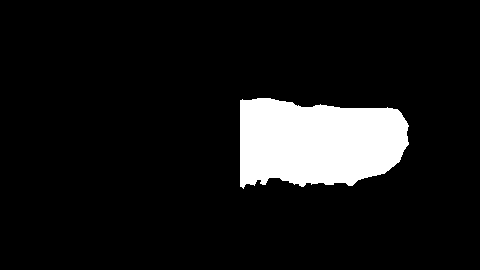

In [34]:
image_example = Image.open('/kaggle/working/train_mask/mask/mask_6.png')
image_example

In [35]:
DEVICE = 'cuda'

EPOCHS = 30
LR = 0.001
IMAGE_SIZE = 128
BATCH_SIZE = 32

ENCODER = 'timm-efficientnet-b2'
WEIGHTS = 'imagenet'

In [36]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
# from torch.nn import ConvTranspose2d
# from torch.nn import Conv2d
# from torch.nn import MaxPool2d
# from torch.nn import Module
# from torch.nn import ModuleList
# from torch.nn import ReLU
# from torchvision.transforms import CenterCrop
# from torch.nn import functional as F
from torch import nn

In [37]:
train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.8),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor()
])

valid_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.ToTensor()
])

In [38]:
class TrashCanDataset(Dataset):
    def __init__(self,df,transforms=None):
        self.df = df
        self.transforms = transforms
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        
        image_path = row.image
        image = Image.open(image_path)
        
        mask_path = row.masks
        mask = Image.open(mask_path)
        
        if self.transforms:
            return self.transforms(image),self.transforms(mask)
        else:
            return image,mask

In [39]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df_for_training, test_size = 0.2, random_state=42)

In [40]:
len(train_df),len(valid_df)

(4852, 1213)

In [41]:
train_data_custom = TrashCanDataset(df=train_df, 
                                      transforms=train_transforms)
valid_data_custom = TrashCanDataset(df=valid_df, 
                                     transforms=valid_transforms)
train_data_custom, valid_data_custom

(<__main__.TrashCanDataset at 0x7f933ac0cfd0>,
 <__main__.TrashCanDataset at 0x7f940edd1ae0>)

In [42]:
len(train_data_custom), len(valid_data_custom)

(4852, 1213)

In [43]:
image, mask = train_data_custom[0]
image, mask

(tensor([[[0.3647, 0.3765, 0.3882,  ..., 0.3059, 0.3686, 0.4000],
          [0.3176, 0.3373, 0.3373,  ..., 0.6118, 0.6196, 0.6235],
          [0.2784, 0.3176, 0.2941,  ..., 0.6588, 0.6667, 0.6510],
          ...,
          [0.6863, 0.6706, 0.6588,  ..., 0.4941, 0.3725, 0.3412],
          [0.7176, 0.7490, 0.7059,  ..., 0.3569, 0.2941, 0.2902],
          [0.7020, 0.7373, 0.7843,  ..., 0.2196, 0.1882, 0.1882]],
 
         [[0.1843, 0.1843, 0.1843,  ..., 0.3333, 0.3961, 0.4275],
          [0.0745, 0.0824, 0.0745,  ..., 0.6392, 0.6471, 0.6510],
          [0.0078, 0.0353, 0.0118,  ..., 0.6863, 0.6941, 0.6784],
          ...,
          [0.7098, 0.6941, 0.6824,  ..., 0.1255, 0.0353, 0.0078],
          [0.7412, 0.7725, 0.7294,  ..., 0.0353, 0.0118, 0.0157],
          [0.7255, 0.7608, 0.8078,  ..., 0.0196, 0.0157, 0.0196]],
 
         [[0.2588, 0.2667, 0.2706,  ..., 0.3059, 0.3686, 0.4000],
          [0.1765, 0.1922, 0.1882,  ..., 0.6118, 0.6196, 0.6235],
          [0.1216, 0.1608, 0.1333,  ...,

In [44]:
train_dataloader = DataLoader(train_data_custom, batch_size=BATCH_SIZE, shuffle = True)
valid_dataloader = DataLoader(valid_data_custom, batch_size=BATCH_SIZE)
train_dataloader, valid_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f933ac0cd90>,
 <torch.utils.data.dataloader.DataLoader at 0x7f940ec51390>)

In [45]:
print(f"total number of batches in train_dataloader : {len(train_dataloader)}")
print(f"total number of batches in valid_dataloader : {len(valid_dataloader)}")

total number of batches in train_dataloader : 152
total number of batches in valid_dataloader : 38


In [46]:
for image, mask in train_dataloader:
    break

print(f"One batch image shape : {image.shape}")
print(f"One batch mask shape : {mask.shape}")

One batch image shape : torch.Size([32, 3, 128, 128])
One batch mask shape : torch.Size([32, 1, 128, 128])


In [47]:
!pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.4 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=b92a5cd927c3b00c8824c7bd47444806c2e57b028c7ba47de717c5c96383ef15
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=50f766bff71578078166752505b74786a969258545308a394bac8a3b41f21e9a
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficien

In [48]:
from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import DiceLoss

In [49]:
class SegmentationModel(nn.Module):
    def __init__(self):
        super(SegmentationModel,self).__init__()

        self.arc = smp.Unet(
            encoder_name = ENCODER,
            encoder_weights = WEIGHTS,
            in_channels = 3,
            classes = 1,
            activation = None
        )

    def forward(self, images, masks = None):
        logits = self.arc(images)

        if masks != None:
            loss1 = DiceLoss(mode = 'binary')(logits, masks)
            loss2 = nn.BCEWithLogitsLoss()(logits,masks)
            return logits, loss1 + loss2

        return logits

In [50]:
model = SegmentationModel()
model.to(DEVICE)

Downloading: "https://github.com/huggingface/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b2-e393ef04.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b2-e393ef04.pth
100%|██████████| 35.1M/35.1M [00:00<00:00, 289MB/s]


SegmentationModel(
  (arc): Unet(
    (encoder): EfficientNetEncoder(
      (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNormAct2d(
        32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): Swish()
      )
      (blocks): Sequential(
        (0): Sequential(
          (0): DepthwiseSeparableConv(
            (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn1): BatchNormAct2d(
              32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): Swish()
            )
            (se): SqueezeExcite(
              (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
              (act1): Swish()
              (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
              (gate): Sigmoid()
            )
           

In [51]:
from tqdm import tqdm
def train_fn(data_loader, model, optimizer):
    model.train()
    total_loss = 0.0

    for images, masks in tqdm(data_loader):
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)

        optimizer.zero_grad()
        logits, loss = model(images,masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)

In [52]:
def eval_fn(data_loader, model):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for images, masks in tqdm(data_loader):
            images = images.to(DEVICE)
            masks = masks.to(DEVICE)

            logits, loss = model(images,masks)

            total_loss += loss.item()

    return total_loss / len(data_loader)

In [53]:
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

In [54]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

results = {
        "train_loss": [],
        "valid_loss": []
        }

best_valid_loss = np.Inf
for i in range(EPOCHS):
    train_loss = train_fn(train_dataloader, model, optimizer)
    valid_loss = eval_fn(valid_dataloader, model)

    if valid_loss < best_valid_loss:
        torch.save(model.state_dict(),'/kaggle/working/best_model.pt')
        print("SAVED-MODEL")
        best_valid_loss = valid_loss

    print(f"Epoch : {i+1} Train_loss : {train_loss} Valid_loss : {valid_loss}")
    
    results["train_loss"].append(train_loss)
    results["valid_loss"].append(valid_loss)

100%|██████████| 38/38 [00:12<00:00,  3.16it/s]


SAVED-MODEL
Epoch : 1 Train_loss : 1.0249654548732858 Valid_loss : 0.8611040476121401


100%|██████████| 38/38 [00:06<00:00,  6.08it/s]


SAVED-MODEL
Epoch : 2 Train_loss : 0.8664819929552706 Valid_loss : 0.7983283039770628


100%|██████████| 38/38 [00:06<00:00,  6.23it/s]


Epoch : 3 Train_loss : 0.8479019419143075 Valid_loss : 0.8243122508651332


100%|██████████| 38/38 [00:05<00:00,  6.44it/s]


SAVED-MODEL
Epoch : 4 Train_loss : 0.822799304990392 Valid_loss : 0.7308542885278401


100%|██████████| 38/38 [00:05<00:00,  6.63it/s]


SAVED-MODEL
Epoch : 5 Train_loss : 0.790968735163149 Valid_loss : 0.7306563469924425


100%|██████████| 38/38 [00:06<00:00,  6.22it/s]


Epoch : 6 Train_loss : 0.7968065589666367 Valid_loss : 0.7655669152736664


100%|██████████| 38/38 [00:06<00:00,  6.07it/s]


Epoch : 7 Train_loss : 0.7852895910802641 Valid_loss : 0.7553870701476147


100%|██████████| 38/38 [00:06<00:00,  5.55it/s]


Epoch : 8 Train_loss : 0.773977156924574 Valid_loss : 0.7765039017325953


100%|██████████| 38/38 [00:06<00:00,  6.21it/s]


SAVED-MODEL
Epoch : 9 Train_loss : 0.7772093897587374 Valid_loss : 0.7231152339985496


100%|██████████| 38/38 [00:06<00:00,  5.85it/s]


Epoch : 10 Train_loss : 0.7449540746839423 Valid_loss : 0.7662664628342578


100%|██████████| 38/38 [00:06<00:00,  5.97it/s]


Epoch : 11 Train_loss : 0.751015447668339 Valid_loss : 0.7707816174155787


100%|██████████| 38/38 [00:06<00:00,  6.25it/s]


SAVED-MODEL
Epoch : 12 Train_loss : 0.744497012346983 Valid_loss : 0.7119951122685483


100%|██████████| 38/38 [00:06<00:00,  5.46it/s]


Epoch : 13 Train_loss : 0.7451455379395109 Valid_loss : 0.7159538716077805


100%|██████████| 38/38 [00:06<00:00,  5.90it/s]


Epoch : 14 Train_loss : 0.7447285250221428 Valid_loss : 0.7448814252489492


100%|██████████| 38/38 [00:06<00:00,  6.30it/s]


Epoch : 15 Train_loss : 0.733263861584036 Valid_loss : 0.7365272335316005


100%|██████████| 38/38 [00:06<00:00,  5.87it/s]


SAVED-MODEL
Epoch : 16 Train_loss : 0.7264350974246075 Valid_loss : 0.7094052951586874


100%|██████████| 38/38 [00:05<00:00,  6.41it/s]


Epoch : 17 Train_loss : 0.7309726498236782 Valid_loss : 0.8039920682969847


100%|██████████| 38/38 [00:08<00:00,  4.31it/s]


Epoch : 18 Train_loss : 0.7224577057518458 Valid_loss : 0.7531649925206837


100%|██████████| 38/38 [00:06<00:00,  6.26it/s]


Epoch : 19 Train_loss : 0.6897529334222016 Valid_loss : 0.7287410215327614


100%|██████████| 38/38 [00:07<00:00,  4.86it/s]


Epoch : 20 Train_loss : 0.7116929488746744 Valid_loss : 0.7884183902489511


100%|██████████| 38/38 [00:06<00:00,  6.27it/s]


SAVED-MODEL
Epoch : 21 Train_loss : 0.7218356159956831 Valid_loss : 0.7001078913086339


100%|██████████| 38/38 [00:07<00:00,  4.78it/s]


Epoch : 22 Train_loss : 0.6954595111310482 Valid_loss : 0.7212708361054722


100%|██████████| 38/38 [00:06<00:00,  5.49it/s]


Epoch : 23 Train_loss : 0.6852080216141123 Valid_loss : 0.7533650053174872


100%|██████████| 38/38 [00:09<00:00,  4.11it/s]


Epoch : 24 Train_loss : 0.6813416365338 Valid_loss : 0.7286349370291358


100%|██████████| 38/38 [00:06<00:00,  6.20it/s]


Epoch : 25 Train_loss : 0.6840471878255668 Valid_loss : 0.7596454008629447


100%|██████████| 38/38 [00:06<00:00,  6.33it/s]


Epoch : 26 Train_loss : 0.6922760780312514 Valid_loss : 0.727250158002502


100%|██████████| 38/38 [00:06<00:00,  5.98it/s]


Epoch : 27 Train_loss : 0.6860862031186882 Valid_loss : 0.7858369358276066


100%|██████████| 38/38 [00:06<00:00,  6.02it/s]


Epoch : 28 Train_loss : 0.686935158936601 Valid_loss : 0.7507671666772742


100%|██████████| 38/38 [00:06<00:00,  6.03it/s]


Epoch : 29 Train_loss : 0.678860493004322 Valid_loss : 0.7774100397762499


100%|██████████| 38/38 [00:06<00:00,  5.98it/s]

Epoch : 30 Train_loss : 0.6830074626364206 Valid_loss : 0.7451876590126439


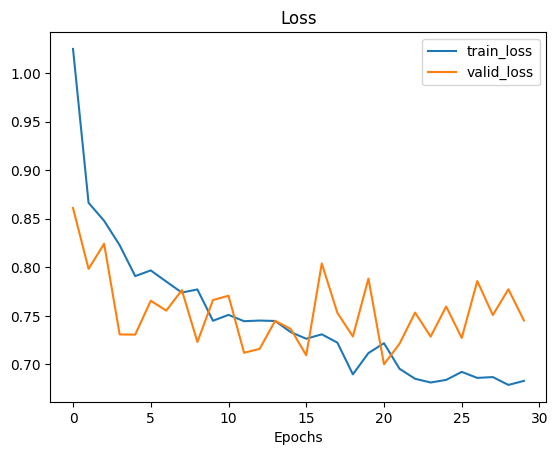

In [55]:
import matplotlib.pyplot as plt

train_loss = results['train_loss']
valid_loss = results['valid_loss']

epochs = range(len(results['train_loss']))

plt.plot(epochs, train_loss, label='train_loss')
plt.plot(epochs, valid_loss, label='valid_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

In [56]:
test_json_file = "/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test-without_segmentation.json"
f = open(test_json_file)
test_json = json.load(f)
test_json.keys()

dict_keys(['info', 'licenses', 'images'])

In [57]:
test_images_df = pd.DataFrame.from_dict(test_json['images'])
test_images_df.head()

,id,file_name,width,height
0,6066,vid_000038_frame0000023.jpg,480,270
1,6067,vid_000069_frame0000002.jpg,480,270
2,6068,vid_000090_frame0000048.jpg,480,270
3,6069,vid_000091_frame0000042.jpg,480,270
4,6070,vid_000063_frame0000026.jpg,480,270


In [58]:
def run_length_encode(mask):
    
    pixel_values = mask.flatten()
    pixel_values = pixel_values.int()
    pixel_values = np.asarray(pixel_values,dtype=int)
    encoded_values = []
    current_pixel = pixel_values[0]
    count = 1

    for pixel in pixel_values[1:]:
        if pixel == current_pixel:
            count += 1
        else:
            encoded_values.extend([current_pixel, count])
            current_pixel = pixel
            count = 1

    
    encoded_values.extend([current_pixel, count])
    return encoded_values

In [59]:
image_id_map = {item['file_name']: item['id'] for item in test_json['images']}

In [60]:
image_id_map_list = list(image_id_map.keys())
image_id_map_list[0]

'vid_000038_frame0000023.jpg'

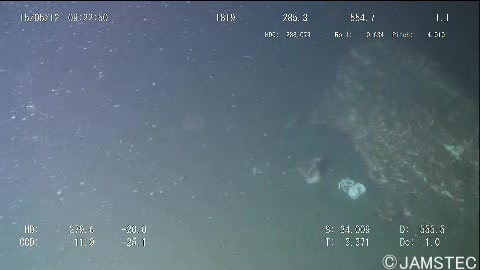

In [61]:
img_test_path = os.path.join("/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test",image_id_map_list[0])
image_test = Image.open(img_test_path)
image_test

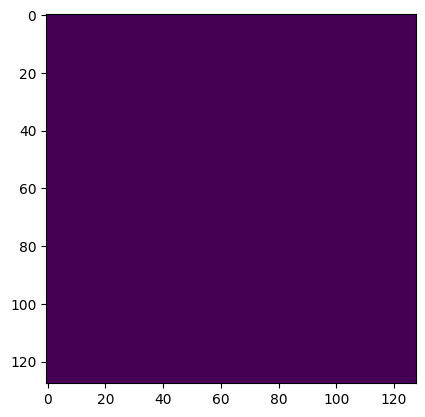

In [62]:
image = Image.open(img_test_path)
image_to_tensor = valid_transforms(image)
model.load_state_dict(torch.load('/kaggle/working/best_model.pt'))
logits_mask = model(image_to_tensor.to(DEVICE).unsqueeze(0))
pred_mask = torch.sigmoid(logits_mask)
pred_mask = (pred_mask > 0.5)*1.0
plt.imshow(pred_mask.detach().cpu().squeeze(0).permute(1, 2, 0))


In [63]:
transform_normal_img = transforms.Resize((270,480))

In [64]:
resized_img = transform_normal_img(pred_mask.detach().cpu())
resized_img.shape

/opt/conda/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 1, 270, 480])

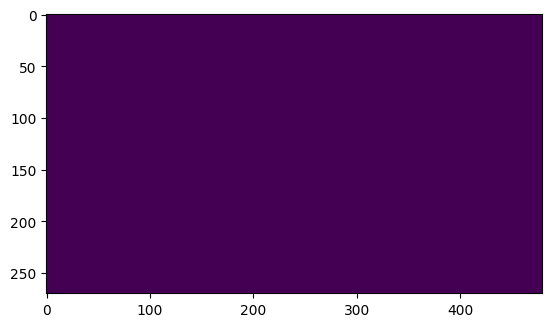

In [65]:
plt.imshow(resized_img.squeeze(0).permute(1, 2, 0))

In [66]:
encoded_mask = run_length_encode(resized_img)
encoded_mask

[0, 129600]

In [67]:
import csv

output_file = '/kaggle/working/submission.csv'
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_id', 'Mask'])
    test_images_dir = '/kaggle/input/trashcan-segmentation-public/trashcan-segmentation-public/test/'
    for img_file, img_id in image_id_map.items():
        print("filename -> " + img_file)
        img_path = os.path.join(test_images_dir, img_file)
        image = Image.open(img_path)
        image_to_tensor = valid_transforms(image)
        model.load_state_dict(torch.load('/kaggle/working/best_model.pt'))
        logits_mask = model(image_to_tensor.to(DEVICE).unsqueeze(0))
        pred_mask = torch.sigmoid(logits_mask)
        pred_mask = (pred_mask > 0.5)*1.0
        resized_pred_mask = transform_normal_img(pred_mask.detach().cpu())
        encoded_mask = run_length_encode(resized_pred_mask)
        writer.writerow([img_id, ' '.join(map(str, encoded_mask))])

print("Submission is ready.")

filename -> vid_000038_frame0000023.jpg
filename -> vid_000069_frame0000002.jpg
filename -> vid_000090_frame0000048.jpg
filename -> vid_000091_frame0000042.jpg
filename -> vid_000063_frame0000026.jpg
filename -> vid_000109_frame0000018.jpg
filename -> vid_000144_frame0000003.jpg
filename -> vid_000052_frame0000062.jpg
filename -> vid_000139_frame0000008.jpg
filename -> vid_000045_frame0000055.jpg
filename -> vid_000152_frame0000027.jpg
filename -> vid_000042_frame0000012.jpg
filename -> vid_000140_frame0000023.jpg
filename -> vid_000111_frame0000008.jpg
filename -> vid_000035_frame0000075.jpg
filename -> vid_000143_frame0000051.jpg
filename -> vid_000038_frame0000021.jpg
filename -> vid_000077_frame0000007.jpg
filename -> vid_000143_frame0000014.jpg
filename -> vid_000116_frame0000003.jpg
filename -> vid_000068_frame0000016.jpg
filename -> vid_000145_frame0000075.jpg
filename -> vid_000031_frame0000048.jpg
filename -> vid_000035_frame0000117.jpg
filename -> vid_000074_frame0000047.jpg
